<a href="https://colab.research.google.com/github/AntonioLunardi/Bank-Loan-Analisys/blob/main/Bank_loan_classification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Data cleaning

## 1.1 Initial exploring and cleaning

In [34]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import get_dummies
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

In [5]:
# Create a seed for being used in the whole code
SEED = 1574

In [6]:
# Read the dataframe
df = pd.read_csv('/content/df1_loan.csv')

In [7]:
# Check the number of columns and rows
df.shape

(500, 15)

In [8]:
#  Data frame first look
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


This is appearently a cleaned and ordered data frame. Although it is necessary to do tests to check if all registers are consistent

In [9]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

The index column is already present

## 1.2 Checking if there is any duplicated loan id

In [10]:
# Count duplicate on 'Loan_ID' column
df.duplicated(subset=['Loan_ID']).sum()

0

The dataframe doesn't have any duplicated register of loan

## 1.3 Removing unecessary column

In [11]:
# Remove the index column considering pandas generates it automatically
df = df.drop(columns=['Unnamed: 0'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


## 1.4 Removing non numerical characters from column

In [12]:
df['Total_Income'] = df['Total_Income'].str.replace('$','')
df['Total_Income'].head(5)

<ipython-input-12-fa80c422c83d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_Income'] = df['Total_Income'].str.replace('$','')


0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: object

## 1.5 Replacing NaNs

In [13]:
# Checking number of NaNs
df.apply(lambda x: x.isnull().value_counts())


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
False,500.0,491,497,488,500.0,473,500.0,500.0,482,486,459,500.0,500.0,500.0
True,NaN,9,3,12,NaN,27,NaN,NaN,18,14,41,NaN,NaN,NaN


In [14]:
# Filling NaN cells with -1 in order to handle them later
df = df.fillna('-1')
df.apply(lambda x: x.isnull().value_counts())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
False,500,500,500,500,500,500,500,500,500,500,500,500,500,500


Inicially all missing values are replaced by -1 in order to be treated for machine learning lately

## 1.6 Adjusting data types

In [15]:
# Checking df variable types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [16]:
# Changing 'Total_Income' type to float64 considering it should be treated as numerical
df['Total_Income'] = df['Total_Income'].astype(float)
df['Total_Income'].dtypes


dtype('float64')

In [17]:
# Changing 'CoapplicantIncome' type to stablish a standard in data
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df['ApplicantIncome'].dtypes

dtype('float64')

In [18]:
df['LoanAmount'] = df['LoanAmount'].astype(float)
df['LoanAmount'].dtypes

dtype('float64')

In [19]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str)
df['Loan_Amount_Term'].dtypes

dtype('O')

In [20]:
# Changing 'Credit_history' to string for stardardization purposes considering that it is a categorical variable
df['Credit_History'] = df['Credit_History'].astype(str)
df['Credit_History'].dtypes

dtype('O')

## 1.7 Replacing NaNs proportionally

In [21]:
# Verify what are the categories and its quantities of each categorical column
# All of them are declared as object type columns
for i in range(0, len(df.columns)):
  if ((df.dtypes[i] == 'object') & (df.columns[i] != 'Loan_ID')): # ID column is not used because it is a unique identificator
    if (df[df.columns[i]].str.contains('-1').any()): # Test if category -1 is present in series in order to replace these cells
      print('\n\nCOLUMN: %s\n' % df.columns[i])
      print(df[df.columns[i]].value_counts())



COLUMN: Gender

Male      400
Female     91
-1          9
Name: Gender, dtype: int64


COLUMN: Married

Yes    322
No     175
-1       3
Name: Married, dtype: int64


COLUMN: Dependents

0     288
1      81
2      79
3+     40
-1     12
Name: Dependents, dtype: int64


COLUMN: Self_Employed

No     407
Yes     66
-1      27
Name: Self_Employed, dtype: int64


COLUMN: Loan_Amount_Term

360.0    415
180.0     35
-1        14
300.0     12
480.0     12
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64


COLUMN: Credit_History

1.0    387
0.0     72
-1      41
Name: Credit_History, dtype: int64


In [22]:
# Verify what are the proportions and categories of each categorical column
# All of them are declared as object type columns
for i in range(0, len(df.columns)):
  if ((df.dtypes[i] == 'object') & (df.columns[i] != 'Loan_ID')): # ID column is not used because it is a unique identificator
    if (df[df.columns[i]].str.contains('-1').any()): # Test if category -1 is present in series in order to replace these cells
      
      calculation_df = pd.DataFrame(df[df.columns[i]].value_counts())
      calculation_df = calculation_df.drop('-1')# Drop the index '-1' row from the calculation_df
      total_valid_elements = calculation_df[df.columns[i]].sum()
      proportion = []
      for index in range(0, len(calculation_df.index)): # Iterate for the calculation of proportion of each category of the data frame
        proportion.append(round(calculation_df.iloc[index][0]/total_valid_elements, 3))
      df[df.columns[i]] = df[df.columns[i]].str.replace('-1',(np.random.choice(calculation_df.index, p=proportion))) # Change this cration to itarative method and not unique
      print('\n\nCOLUMN: %s\n' % df.columns[i])
      print(calculation_df.index)
      print(df[df.columns[i]].value_counts())
      print(proportion)



COLUMN: Gender

Index(['Male', 'Female'], dtype='object')
Male      409
Female     91
Name: Gender, dtype: int64
[0.815, 0.185]


COLUMN: Married

Index(['Yes', 'No'], dtype='object')
Yes    325
No     175
Name: Married, dtype: int64
[0.648, 0.352]


COLUMN: Dependents

Index(['0', '1', '2', '3+'], dtype='object')
0     300
1      81
2      79
3+     40
Name: Dependents, dtype: int64
[0.59, 0.166, 0.162, 0.082]


COLUMN: Self_Employed

Index(['No', 'Yes'], dtype='object')
No     434
Yes     66
Name: Self_Employed, dtype: int64
[0.86, 0.14]


COLUMN: Loan_Amount_Term

Index(['360.0', '180.0', '300.0', '480.0', '120.0', '240.0', '60.0', '84.0',
       '36.0', '12.0'],
      dtype='object')
360.0    429
180.0     35
300.0     12
480.0     12
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64
[0.854, 0.072, 0.025, 0.025, 0.006, 0.006, 0.004, 0.004, 0.002, 0.002]


COLUMN: Credit_History

Index(['1.0', '0.0'], dtype='object')

# 2.0 Prepation for machine learning classification model

## 2.1 Dividing inputs and outputs from data frame

In [23]:
# Separation for training the classification models
model_inputs = df.drop(columns=['Loan_Status', 'Loan_ID'])
loan_status = df['Loan_Status']

## 2.1 Categorical columns dummyzation 

In [24]:
model_inputs.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Total_Income         float64
dtype: object

In [25]:
categorical_column_labels = []
for i in range(0, len(model_inputs.columns)):
  if ((model_inputs.dtypes[i] == 'object')):
    categorical_column_labels.append(model_inputs.columns[i])

categorical_column_labels

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [26]:
model_inputs = get_dummies(data=model_inputs, columns=categorical_column_labels)
model_inputs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,-1.0,5849.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,4583.0,1508.0,128.0,6091.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,3000.0,0.0,66.0,3000.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
3,2583.0,2358.0,120.0,4941.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
4,6000.0,0.0,141.0,6000.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3326.0,913.0,105.0,4239.0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
496,2600.0,1700.0,107.0,4300.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
497,4625.0,2857.0,111.0,7482.0,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
498,2895.0,0.0,95.0,2895.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0


## 2.2 Correlation analysis

<ipython-input-27-bfd912f363b4>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # Defining the mask to set the values in the upper triangle to True


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

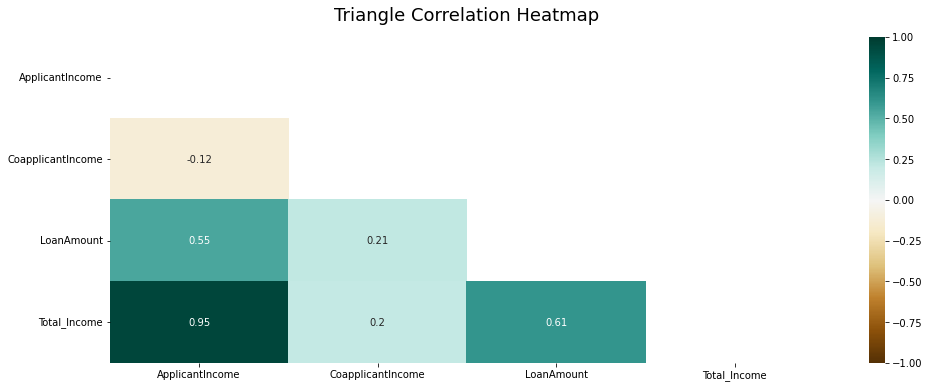

In [27]:
# Graphic plotting
# Upper triangle was hidden for easing the visualization, because it has the same values from the lower one
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # Defining the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16) 

As can be observed in the figure above, the only variables that present a high correlation with each other are total income and application income. The presence of both of them would affect the machine learning models performance negatively with redundant information.

In [28]:
# Remove 'ApplicantIncome' from the data frame
model_inputs = model_inputs.drop(columns='Total_Income')

## 2.3 Columns vectorization

In [29]:
values = Normalizer().fit_transform(model_inputs.values) 
values

array([[ 9.99999868e-01,  0.00000000e+00, -1.70969374e-04, ...,
         0.00000000e+00,  0.00000000e+00,  1.70969374e-04],
       [ 9.49564797e-01,  3.12446806e-01,  2.65206838e-02, ...,
         2.07192842e-04,  0.00000000e+00,  0.00000000e+00],
       [ 9.99757644e-01,  0.00000000e+00,  2.19946682e-02, ...,
         0.00000000e+00,  0.00000000e+00,  3.33252548e-04],
       ...,
       [ 8.50589144e-01,  5.25434202e-01,  2.04141395e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.83911166e-04],
       [ 9.99461539e-01,  0.00000000e+00,  3.27975289e-02, ...,
         0.00000000e+00,  3.45237147e-04,  0.00000000e+00],
       [ 8.17832544e-01,  5.74812751e-01,  2.72046796e-02, ...,
         1.30165931e-04,  0.00000000e+00,  0.00000000e+00]])

## 2.4 Columns stardardization of scale

In [30]:
X = model_inputs.columns
X

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Loan_Amount_Term_12.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [31]:
# Standardize that all columns to have a range [0; 1], in order to avoid that variables's magnitudes influence in the classifications
scaler = StandardScaler()
scaler.fit(model_inputs)
model_inputs_scaled = scaler.transform(model_inputs)

## 2.4 Dimensionality reduction (PCA)

In [32]:
# Checking dimensions
model_inputs_scaled.shape

(500, 30)

In [33]:
n_components = model_inputs_scaled.shape[0]

pca = PCA(n_components = n_components)
pca.fit_transform(model_inputs)

ValueError: ignored